### Neshyba 2023


# A numerical solution to the Particle-on-a-Sphere problem

## Introduction

In this exercise, we'll be looking at the behavior of an electron that is confined to a surface within a 3-dimensional space -- more precisely, the surface of a sphere in that space. Focusing on this motion will help us develop some intuition about, and tools to describe, a type of motion called *angular momentum*. In fact -- and as you'll see -- this will set us up nicely for solving more interesting (and more challenging) problems of quantum mechanics, ultimately leading to objects that are familiar to you, like s- and p-orbitals.

## The usual starting point
We can start with the Schrödinger equation for this problem, written in its usual form

$$
H\psi=E\psi \ \ \ \ (1)
$$

For a particle that can move in three dimensions, we could write $H$ a little more explicitly as

$$
H = PE(x,y,z) - {\hbar^2 \over 2 m} \nabla^2 \ \ \ \ (2)
$$

where the last term on the right represents the kinetic energy of our particle, in which $\nabla^2$ (called the *Laplacian Operator*) is understood to operate in three dimensions. 

About that last point, we should note that $\nabla^2$ takes different forms depending on the coordinate system we are working in. Some are pretty gnarly-looking (see, e.g., https://mathworld.wolfram.com/Laplacian.html). The winner in the simplicity competition is the Cartesian form,

$$
\nabla^2 = {\partial^2 \over \partial x^2} + {\partial^2 \over \partial y^2} + {\partial^2 \over \partial z^2} \ \ \ \ (3)
$$

which is what we'll be using here. 

## Numerical vs analytical
As we've seen in other contexts, we can solve this equation in two fundamentally different ways. The path we'll take here is numerical. In a follow-on CGI, we'll focus on those functions from an analytical perspective.

As in any numerical approach, we will need to discretize our 3d Cartesian space. There are computational considerations here, in that a 3d space leads to matrices that can get pretty big. For example, a discretization of 20 points in each Cartesian direction produces outer product matrices (e.g., matrices corresponding to the kinetic energy, potential energy, and hence the hamiltonian) that measure $8000 \times 8000$ (because $20^3 = 8000$). Such matrices will diagonalize in a less than a minute on a modern laptop computer, but if we get much bigger, the times get intolerably long.

## Matrix representation of the potential energy in 3d
Our goal in constructing a potential energy function is very simple: we want entice the particle (an electron, in this case) to the surface of a sphere that is embedded in 3d space. One way to do that is to assign a low potential energy at or near that surface, and a much higher potential to the rest of the space. Figure 1 illustrates what we mean by this. As long as the energy of a wavefunction is less than $30$ hartrees, it'll be stuck around $r=1$! 

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/Vshell.jpg" height="400" width="500"/>
<strong>Figure 1</strong>. A potential energy function designed to entice a particle to the surface of a sphere. Since this is a slice through space with $x=y=0$, the positions $z=\pm 1$ correspond to a distance (radius) of 1 bohr from the center.
</p>

The next question is, how might we construct a such a function mathematically? One choice is

$$
PE = V \bigl ( 1 -  ( {r \over r_0} )^{1/2} exp  (-{r-r_0 \over \sigma^2}  ) \bigr )  \ \ \ \ (4)
$$

where

- $r_0$ controls the distance at which the potential energy approaches zero. For the function shown in Fig. 1, we've set $r_0=1$, which you can see from the fact that the potential energy approaches zero at $z=1$ and $-1$.
- $\sigma$ controls how sharply the function dips to zero at $r_0$. For the function shown in Fig. 1, we've set $\sigma^2=0.1$. 
- $V$ controls the value the potential energy rises to at distances away from $r_o$. Here, we've set $V=30$. 

Once we have the potential energy defined for every point in three-dimensional space, Eq. 4, we'll need to construct the corresponding outer product matrix. This means flatten it out in a way that those potential energy values lie along the diagonal of a matrix whose dimensions match that of the outer product matrix. This is a straightforward extension of what we've done previously (e.g., OxygenatedGraphene), but in 3d. We start with our potential energy function; most of the job is done for you in the code cells below. 

## Matrix representation of the kinetic energy in 3d
Similarly to what we did before, our strategy begins with constructing kinetic energy matrices for a particle moving in each Cartesian dimension. In terms of Python code, this strategy means we have to construct three kinetic energy matrices,

    KEx = -hbar**2/(2*m) * (-2.0*np.diag(np.ones(nx))+np.diag(np.ones(nx-1),1)+np.diag(np.ones(nx-1),-1))/dx**2
    KEy = -hbar**2/(2*m) * (-2.0*np.diag(np.ones(ny))+np.diag(np.ones(ny-1),1)+np.diag(np.ones(ny-1),-1))/dy**2
    KEz = -hbar**2/(2*m) * (-2.0*np.diag(np.ones(nz))+np.diag(np.ones(nz-1),1)+np.diag(np.ones(nz-1),-1))/dz**2

We will also need three identity matrices,

    Ix = np.diag(np.ones(nx))
    Iy = np.diag(np.ones(ny))
    Iz = np.diag(np.ones(nz))

The next step is to combine these kinetic energy matrices using a Kronecker delta function,

    KE = PL.kron3(KEx,Iy,Iz) + PL.kron3(Ix,KEy,Iz) + PL.kron3(Ix,Iy,KEz)
    
where PL.kron3 is a three-dimensional generalization of Numpy's kron2 function, supplied in our PchemLibrary. 

## Degeneracies
When multiple states have the same energy, we say that energy level is *degenerate*. You're going to encounter a lot of degeneracy in the results you get here, so it's useful to get some of the language down. Here, we signify the degeneracy of our particle-on-a-sphere eigenfunctions with the symbol $g_l$, and say

- $g_l=1$ means there's only one state with a certain energy
- $g_l=2$ means there are two states with the same energy
- $g_l=3$ means there are three states ...

## Learning goals
The main learning goals of this exercise are:
1. I can construct a hamiltonian matrix for a particle in three dimensions.
1. I can describe the shapes and degeneracies of solutions to the Particle-on-a-Sphere problem.

## References
1. https://www.physik.unibe.ch/unibe/portal/fak_naturwis/b_paw/a_fphyast/content/e41821/e41822/e140946/e148658/e875197/files902624/circle_ger.pdf
1. https://math.stackexchange.com/questions/3120948/discretization-matrix-for-3d-poisson-equation.
1. https://en.wikipedia.org/wiki/Angular_momentum.

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry(system='atomic').Quantity
import numpy as np
import scipy.linalg as spla
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import PchemLibrary as PL
%matplotlib notebook

In [2]:
# Quantum constants
hbar = AssignQuantity(1,'atomic_unit_of_time * hartree'); print(hbar)
h = hbar*2*np.pi; print(h)
m = AssignQuantity(1,'atomic_unit_of_mass'); print(m)

1 atomic_unit_of_time * hartree
6.283185307179586 atomic_unit_of_time * hartree
1 electron_mass


### Estimating the outer product dimension
If we discretize in 3d space with a certain number of points (call it $n$), the outer product matrix of an operator in 3d space (like $H$ and $\nabla^2$ presented above) measures $N=n^3$ on each side. In the cell below, figure out the biggest we can make $n$ to keep $N<8000$.

In [3]:
### BEGIN SOLUTION

for n in range(25):
    print(n,n**3)

### END SOLUTION

0 0
1 1
2 8
3 27
4 64
5 125
6 216
7 343
8 512
9 729
10 1000
11 1331
12 1728
13 2197
14 2744
15 3375
16 4096
17 4913
18 5832
19 6859
20 8000
21 9261
22 10648
23 12167
24 13824


### Pause for analysis
What's the biggest discretizion size in 3d space ($n$) we can get away with, and still keep the outer product matrix ($N=n^3$ on each side) within $N<8000$? 

### BEGIN SOLUTION

Looks like $n$ can get as big as 19.

### END SOLUTION

### Defining the Cartesian space we're working in
The cell below defines our Cartesian space. We're using a new, funky Python syntax, 

    x = y = z = ...
    
which makes x, y, and z identical.

This code cell uses our own (PchemLibrary) version of meshgrid to avoid an annoying feature of how Numpy does it. There's a flag, called "reporting", that (if you set it to True) reports how the grids are organized. Set the flag to True in the cell below, and execute it.

In [4]:
# Define the space and create the (identical) x, y, and z spaces
boxwidth = 2
nsteps = 19
nx = ny = nz = nsteps
x = y = z = np.linspace(-boxwidth,boxwidth,nsteps)
dx = x[1]-x[0]
dy = y[1]-y[0]
dz = z[1]-z[0]

# Make gridded versions of these 
xgrid,ygrid,zgrid = PL.meshgrid3d(x,y,z,reporting=False)

### Creating our 3d potential energy surface
This function defines a a function, "shellpot," whose job it is to create a potential energy surface in Cartesian space such that

- $PE=0$ at a specified radius
- $PE>>0$ (in this case, $PE=20$) everywhere else. 

The idea is that the lowest-energy quantum states of the particle will be localized around the lowest potential energy, i.e., on that surface. 

In [5]:
# Defining the shell potential
def shellpot(x,y,z,r0,V):
    r2 = x**2 + y**2 + z**2
    r = np.sqrt(r2)
    sigma2 = .1
    result1 = r**.5*np.exp(-(r-r0)**2/sigma2)
    result2 = 1 - result1 / r0**.5
    result3 = result2*V
    return result3, r

# Use our shell potential energy function to create the potential energy in Cartesian space 
r0 = AssignQuantity(1,'bohr')
V = AssignQuantity(20,'hartree')
Vofr, r = shellpot(xgrid,ygrid,zgrid,r0.magnitude,V.magnitude)

### Inspecting our result
The cell below allows us to visualize what this potential energy surface looks like if we march along a vertical line (with $x=0$ and $y=0$) of our space. If all has gone well, this will look qualitatively like Fig. 1 in the Introduction.

<IPython.core.display.Javascript object>


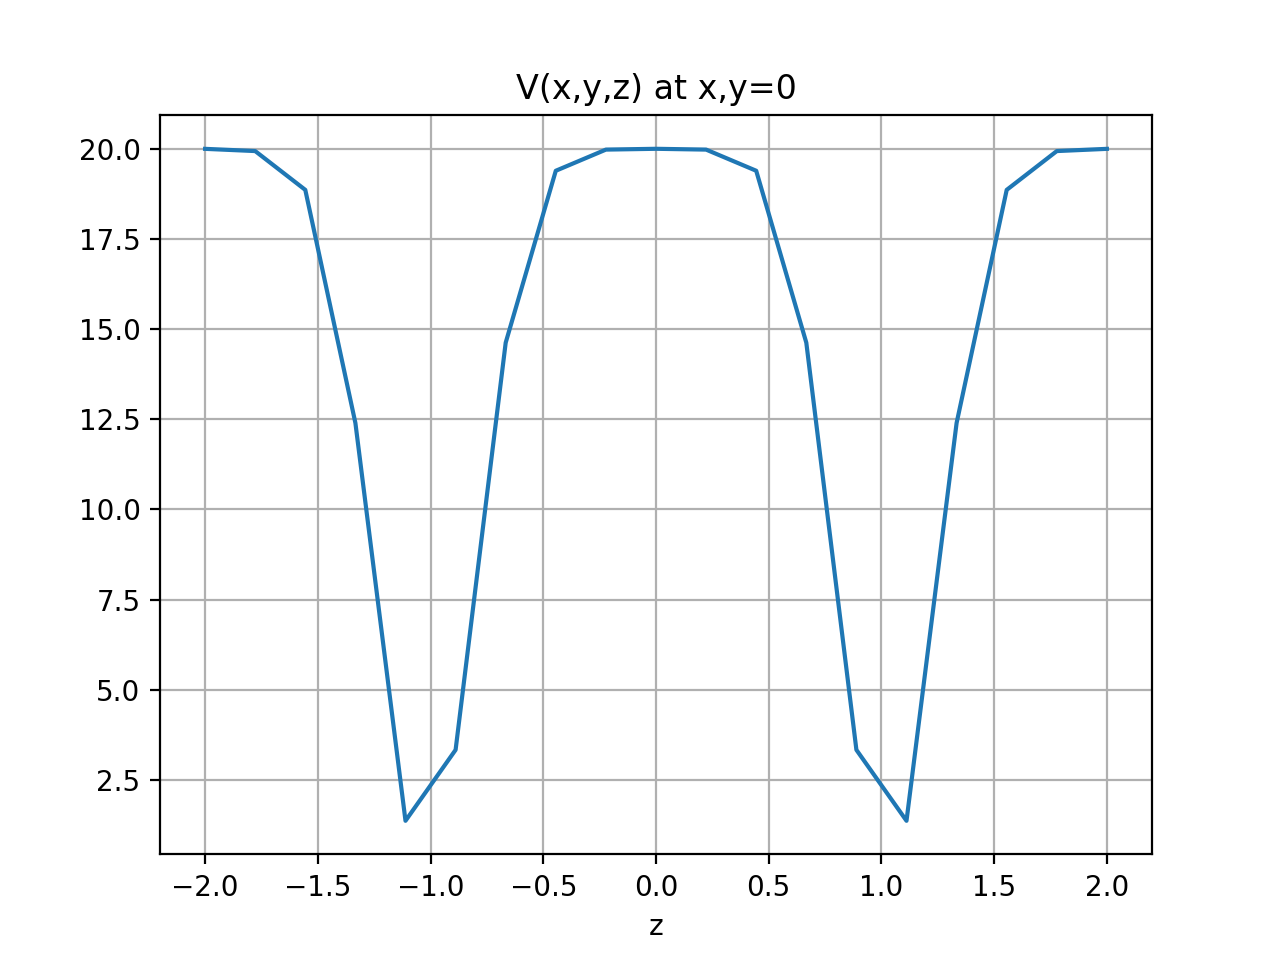

In [6]:
# Take a vertical slice through V(r) (varying z, but with x=y=0)
imidx = int(nx/2)
imidy = int(ny/2)
Vofr_along_z = Vofr[imidx,imidy,:]
plt.figure()
plt.plot(z,Vofr_along_z,'-')
plt.title('V(x,y,z) at x,y=0')
plt.xlabel('z')
plt.grid(True)

### Pause for analysis
In the cell below, make a note of any significant differences you see in this graph compared to Fig. 1 in the Introduction.

### BEGIN SOLUTION

The potential goes up only to 20 instead of 30. Also, there are fewer points.

### END SOLUTION

### Your turn
In the cell below, do something similar, but march along a *horizontal* line of our space, with $y=0$ and $z=0$. If all has gone well, this will look like the slice you just plotted. You should probably re-label the horizontal axis as "x" instead of "z", however.

<IPython.core.display.Javascript object>


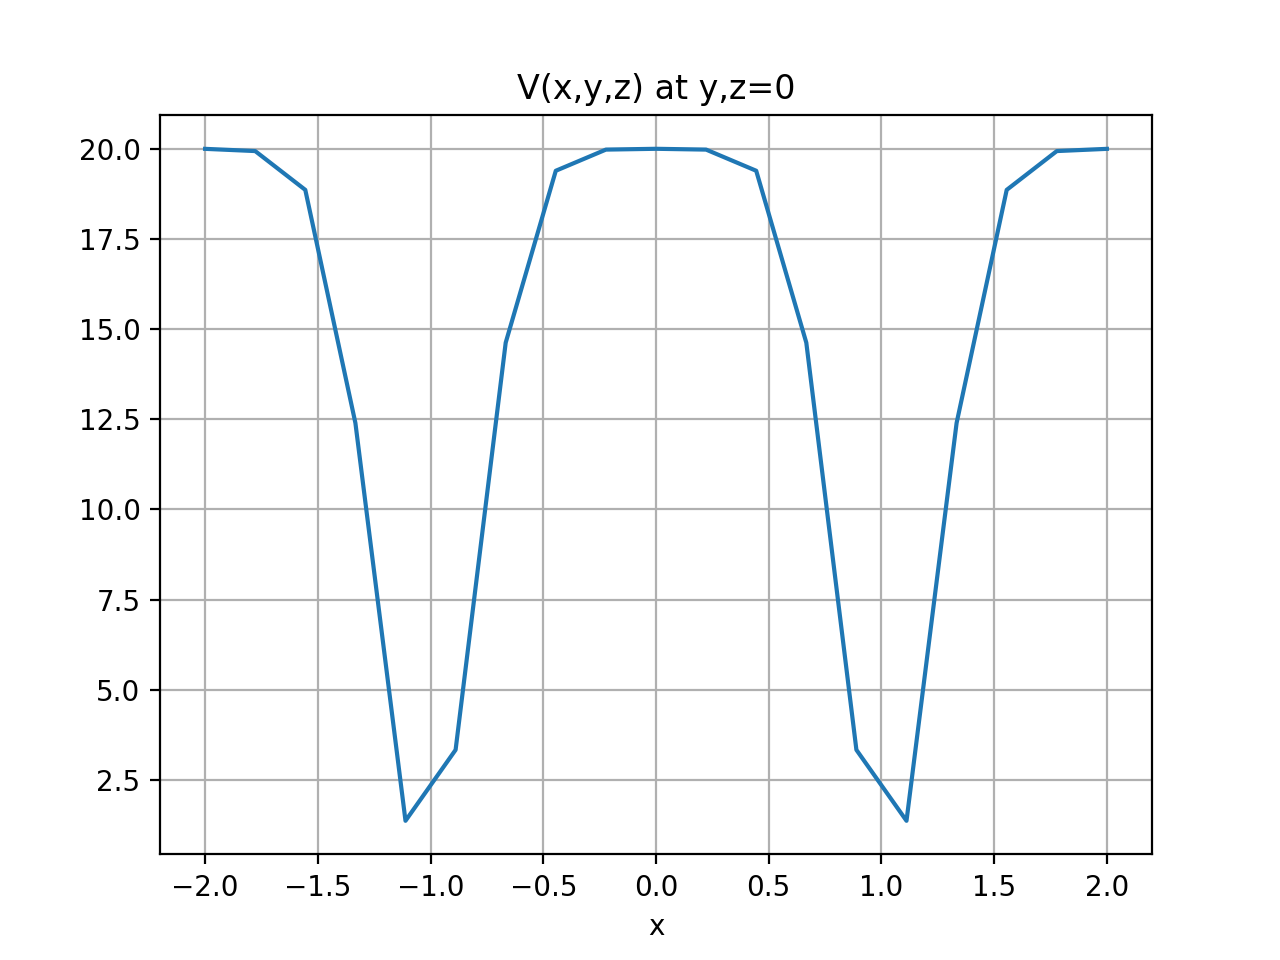

In [7]:
# Take a horizontal slice through V(r) (varying x, but with y=z=0)
### BEGIN SOLUTION
imidy = int(ny/2)
imidz = int(nz/2)
Vofr_along_x = Vofr[:,imidx,imidy]
plt.figure()
plt.plot(x,Vofr_along_x,'-')
plt.title('V(x,y,z) at y,z=0')
plt.xlabel('x')
plt.grid(True)
### END SOLUTION

### Creating the potential energy matrix
This cell converts our potential energy function into matrix form.

In [8]:
# Construct the matrix representation of the potential energy
PE = np.diag(np.reshape(Vofr,nsteps**3))

### Creating the kinetic energy matrix
In the cell below we use a function, kron3, which is the 3d equivalent of the 2d kronecker delta algorithm we used before, to assemble the 3-d kinetic energy matrix.

In [9]:
## Matrix representation of the 1-d kinetic energy operators
KEx = -hbar**2/(2*m) * (-2.0*np.diag(np.ones(nx))+np.diag(np.ones(nx-1),1)+np.diag(np.ones(nx-1),-1))/dx**2
KEy = -hbar**2/(2*m) * (-2.0*np.diag(np.ones(ny))+np.diag(np.ones(ny-1),1)+np.diag(np.ones(ny-1),-1))/dy**2
KEz = -hbar**2/(2*m) * (-2.0*np.diag(np.ones(nz))+np.diag(np.ones(nz-1),1)+np.diag(np.ones(nz-1),-1))/dz**2

# We'll also need some identity matrices
Ix = Iy = Iz = np.diag(np.ones(nsteps))

# Use our new kronecker delta function to assemble the kinetic energy matrix over all three spatial dimensions
KE = PL.kron3(Ix,Iy,KEz.magnitude) + PL.kron3(Ix,KEy.magnitude,Iz) + PL.kron3(KEx.magnitude,Ix,Iy)
print(np.shape(KE))

(6859, 6859)


### Make the Hamiltonian and solve (diagonalize) it
Here we construct the Hamiltonian and use spla.eigh to diagonalize it. A time-saving device is to tell spla.eigh that we want only eigenstates between zero and $V$ in energy. With that activated, for a discretization of $20\times20\times20$, this will take less than a minute. 

In [10]:
# Construct the Hamiltonian
### BEGIN SOLUTION
H = KE + PE
### END SOLUTION

# Diagonalize it
Epsi,psi = spla.eigh(H, subset_by_value=[0, V.magnitude])

### Next, we visualize the energies

<IPython.core.display.Javascript object>


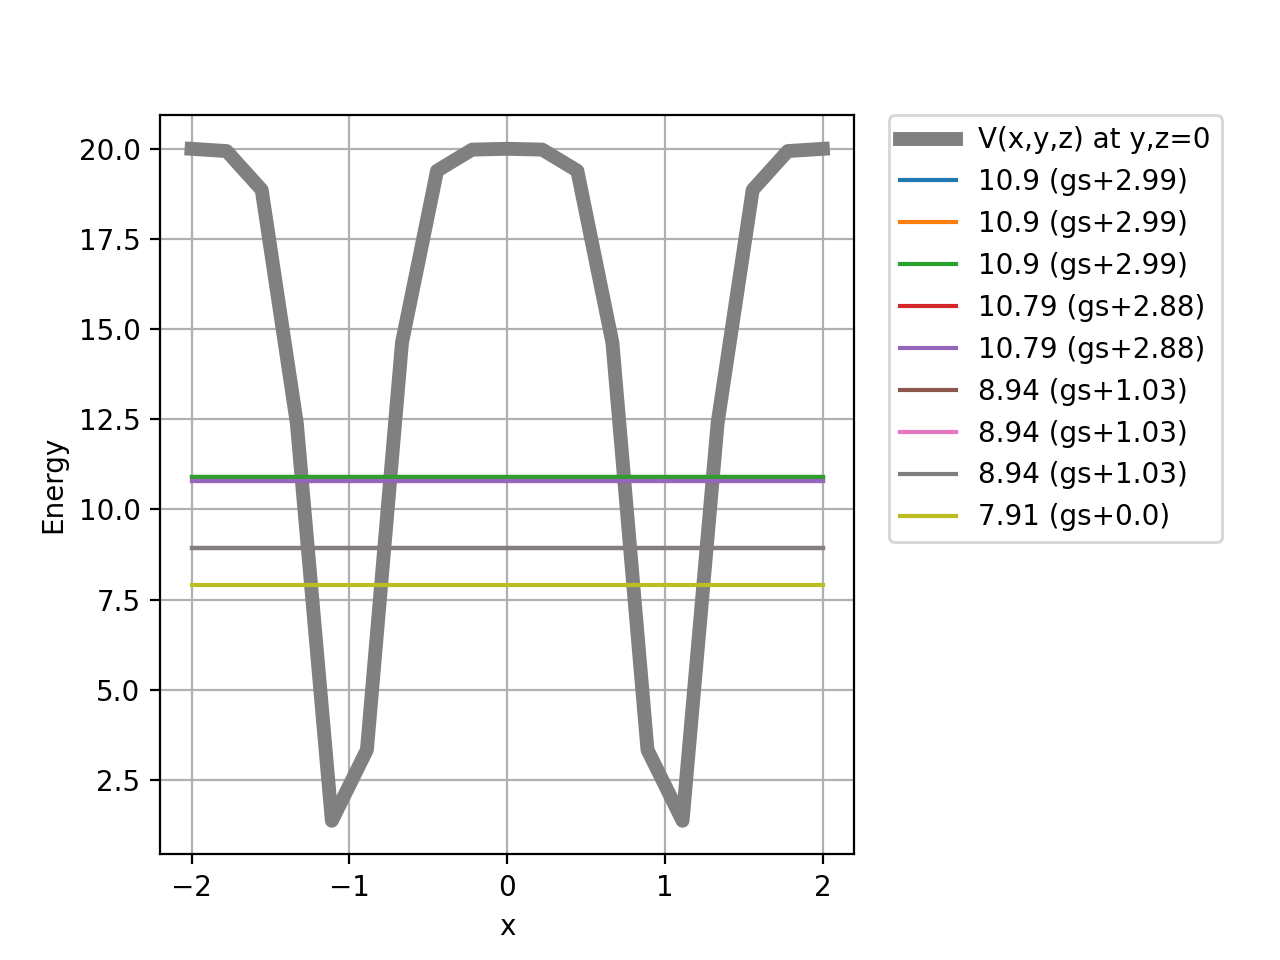

In [11]:
# Compute energy differences
Epsi_above0 = Epsi-Epsi[0]

# Visualize the energies agains the potential energy
f=plt.figure()
ax=f.add_subplot(111)
n = 9
plt.plot(x,Vofr_along_x,'gray',linewidth=5,label='V(x,y,z) at y,z=0')
for i in range(n-1,-1,-1):
    thisEnergyDifference = round(Epsi_above0[i],2)
    thisEnergy = round(Epsi[i],2)
    plt.plot( [x[0],x[-1]], [Epsi[i],Epsi[i]], label=str(thisEnergy)+' (gs+'+str(thisEnergyDifference)+')')
plt.grid('True')
plt.xlabel('x')
plt.ylabel('Energy')

# Legend on the side
L=plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
box=ax.get_position()
ax.set_position([box.x0,box.y0,0.7*box.width,box.height])

### Degeneracies of your numerical results
In the cell below, describe the degeneracies of your results. Because these are numerical results, we'll have to decide on some kind of tolerance that says "if energies are this close, I'll call them equal." So, let's say two states are degenerate if their energies lie within ~0.2 hartrees of one another. 

### BEGIN SOLUTION

Ground-state energy level has $g_l=1$  
Second energy level has $g_l=3$  
Third has $g_l=5$  

### END SOLUTION

### Next, we visualize the states themselves
The variable plot_until_index is set to show the first four eigenfunctions here, but you can bump that up if you want to look at more.

In [12]:
# Decide how many states we want to look at
plot_until_index = 4

# Loop over them
for thisindex in range(0,plot_until_index):
    
    # Extract this state
    thispsi = psi[:,thisindex]*1000
    thisEpsi = round(Epsi[thisindex],2)

    # Visualize it in 3d
    values = np.real(thispsi).flatten()
    isovalfactor = 0.4
    maxposval = np.max(values)*isovalfactor
    maxnegval = -np.max(-values)*isovalfactor
    print('psi ', thisindex)
    fig = go.Figure(data=go.Isosurface(
        x=xgrid.flatten(),
        y=ygrid.flatten(),
        z=zgrid.flatten(),
        value=values,
        isomin=maxnegval,
        isomax=maxposval,
        caps=dict(x_show=False, y_show=False, z_show=False)
    ))
    
    
    fig.show()

psi  0


psi  1


psi  2


psi  3


### Pause for analysis
A close look at these functions will reveal a relationship between the *number of planar nodes* and the *degeneracies* of the energy levels. Describe that relationship in the cell below.

Relationship between the number of planar nodes and the degeneracies of the first three energy levels (ground state plus two above it): 

### BEGIN SOLUTION

- In the first energy level, there is only one state (hence $g_l=1$). It has no node.
- In the second energy level, there are three degenerate states ($g_l=3$). Each has one planar node.
- in the third energy level, there are five degenerate states ($g_l=5$)/ Each has two planar nodes.

### END SOLUTION

### Refreshing and saving your code
1. Use the dropdown menu Kernel/Restart
2. Use the dropdown menu Cell/Run All Above
3. Under the "File" dropdown menu item in the upper left is a disk icon. Press it now to save your work (you can, do this at any time as you're working on an assignment, actually).

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Finishing up
Assuming all this has gone smoothly, carry out three more steps (but read this carefully before starting):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page